In [1]:
import numpy as np
import pandas as pd
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
from spacy.language import Language
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load datasets
english = pd.read_csv("english.csv")

# Explore how long the reviews are in general.¶

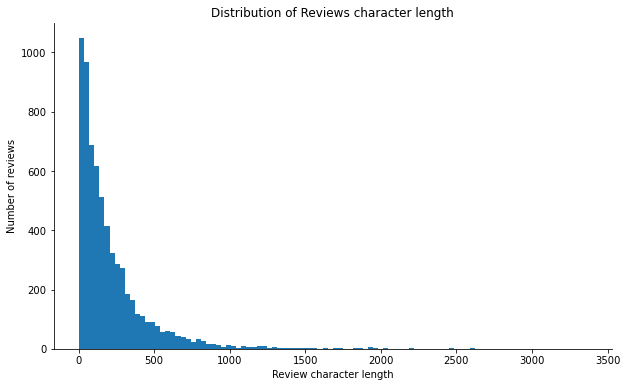

In [3]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in english.eng_review]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Reviews character length')
plt.ylabel('Number of reviews')
plt.xlabel('Review character length')
sns.despine();

In [4]:
english_3 = english[english["eng_review"].str.len() < 4]

In [5]:
english_3

,eng_review,lemma_eng_review,rev_stopped,lemma_stopped
17,top,top,NaN,NaN
18,top,top,NaN,NaN
449,top,top,NaN,NaN
451,top,top,NaN,NaN
452,top,top,NaN,NaN
887,top,top,NaN,NaN
1210,top,top,NaN,NaN
1213,top,top,NaN,NaN
1214,top,top,NaN,NaN
1475,top,top,NaN,NaN


In [6]:
len(english_3)

30

# What reviews were about.

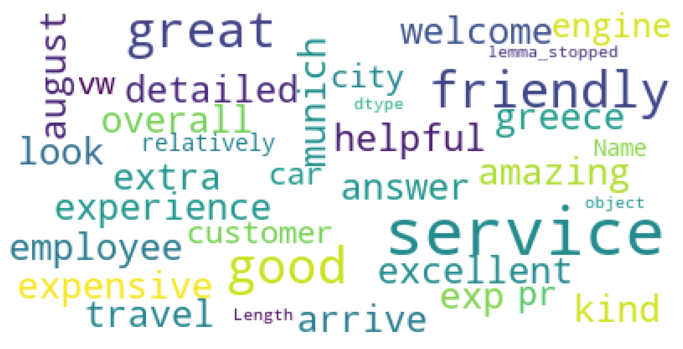

In [7]:
# english reviews
import matplotlib as mpl
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                        background_color='white',
                        stopwords=stopwords,
                        max_words=500,
                        max_font_size=40, 
                        ).generate(str(english.lemma_stopped))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [8]:
english.dropna(inplace=True)

# Word Frequency

In [9]:
# english word frequency
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.graph_objects as go
import plotly.io as pio

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(english.lemma_stopped, 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the reviews text after removing stop words and lemmatization"))
pio.renderers.default = 'iframe'
fig.show()

In [10]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(english.lemma_stopped, 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the reviews text after removing stop words and lemmatization"))
pio.renderers.default = 'iframe'
fig.show()

# TOPIC MODELLING

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,
                            )

data_vectorized = vectorizer.fit_transform(english.lemma_stopped)

lda_model = LatentDirichletAllocation(n_components=5, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
pyLDAvis.save_html(vis, "top_5_topicsb.html")

/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in fav

In [12]:
#document term matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(english.lemma_stopped)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = english.index
data_dtm

,ab,abandon,abgekleickt,abhi,ability,abirliki,able,abolish,abouthand,aboutmany,...,ödemis,öksüz,ömur,özdemir,özgür,übermuth,ünal,ünalat,ünali,škoda
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Recreate document-term matrix
data_cv = cv.fit_transform(english.lemma_stopped)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = english.index

In [14]:
from gensim import matutils, models
import scipy.sparse

/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [15]:
# One of the required inputs is a term-document matrix
tdm = data_stop.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,6509,6510,6511,6512,6513,6514,6515,6516,6517,6518
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abgekleickt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [17]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [18]:
id2word

{3656: 'friendly',
 10018: 'welcome',
 3279: 'extra',
 4199: 'helpful',
 2495: 'detailed',
 423: 'answer',
 7142: 'question',
 3183: 'excellent',
 8092: 'service',
 6372: 'overall',
 3925: 'great',
 3235: 'experience',
 3263: 'express',
 489: 'appointment',
 2243: 'day',
 2131: 'customer',
 6320: 'orient',
 7226: 'reachable',
 9346: 'transparent',
 10167: 'work',
 2021: 'cost',
 1726: 'communication',
 6491: 'party',
 5953: 'need',
 4779: 'involve',
 1379: 'case',
 7299: 'recommendation',
 2949: 'employee',
 3868: 'good',
 5330: 'look',
 367: 'amazing',
 4980: 'kind',
 3233: 'expensive',
 565: 'arrive',
 5878: 'munich',
 9352: 'travel',
 3948: 'greece',
 700: 'august',
 2991: 'engine',
 6928: 'problem',
 640: 'audi',
 6613: 'personnel',
 10324: 'zentrum',
 2858: 'efficient',
 7272: 'receive',
 1285: 'car',
 5133: 'late',
 3128: 'evening',
 3453: 'find',
 7491: 'repair',
 4388: 'hour',
 2413: 'deliver',
 6004: 'new',
 6067: 'noon',
 8474: 'special',
 9033: 'thank',
 5841: 'mr',
 5527: '

In [19]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.031*"car" + 0.017*"audi" + 0.013*"service" + 0.011*"customer" + 0.011*"time" + 0.010*"vehicle" + 0.008*"appointment" + 0.008*"dealership" + 0.007*"drive" + 0.007*"want"'),
 (1,
  '0.035*"service" + 0.035*"mr" + 0.028*"friendly" + 0.025*"car" + 0.025*"great" + 0.024*"good" + 0.022*"thank" + 0.021*"advice" + 0.018*"audi" + 0.017*"competent"')]

In [20]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.035*"car" + 0.017*"audi" + 0.012*"vehicle" + 0.010*"time" + 0.009*"service" + 0.009*"repair" + 0.009*"drive" + 0.009*"dealership" + 0.009*"buy" + 0.007*"customer"'),
 (1,
  '0.040*"mr" + 0.036*"service" + 0.029*"friendly" + 0.028*"great" + 0.027*"car" + 0.027*"good" + 0.025*"thank" + 0.024*"advice" + 0.020*"competent" + 0.018*"audi"'),
 (2,
  '0.025*"service" + 0.023*"customer" + 0.017*"audi" + 0.016*"car" + 0.012*"time" + 0.011*"appointment" + 0.007*"employee" + 0.007*"staff" + 0.007*"come" + 0.007*"dealership"')]

In [21]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.058*"mr" + 0.034*"thank" + 0.032*"car" + 0.023*"audi" + 0.022*"buy" + 0.018*"advice" + 0.014*"vehicle" + 0.013*"great" + 0.013*"friendly" + 0.012*"competent"'),
 (1,
  '0.035*"car" + 0.018*"audi" + 0.013*"time" + 0.012*"service" + 0.011*"vehicle" + 0.010*"customer" + 0.009*"appointment" + 0.008*"drive" + 0.008*"buy" + 0.008*"unfortunately"'),
 (2,
  '0.068*"service" + 0.057*"friendly" + 0.046*"good" + 0.040*"great" + 0.037*"nice" + 0.034*"staff" + 0.030*"competent" + 0.028*"advice" + 0.026*"car" + 0.021*"super"'),
 (3,
  '0.043*"service" + 0.039*"customer" + 0.019*"audi" + 0.012*"great" + 0.011*"thank" + 0.011*"mr" + 0.011*"experience" + 0.010*"dealership" + 0.009*"good" + 0.007*"employee"')]

In [25]:
#I kept the top 20 most frequent words from each topic that found by LDA. 
#Here we are showing a partial table:

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,
                            )

data_vectorized = vectorizer.fit_transform(english.lemma_stopped)

lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,service,car,time,audi,appointment,day,repair,workshop,vehicle,customer,unfortunately,problem,week,work,wait,long,employee,come,cost,hour
Topic 1,audi,car,buy,center,good,vehicle,customer,time,use,new,question,feel,answer,advise,seller,look,dealership,sale,experience,purchase
Topic 2,service,friendly,good,great,staff,advice,competent,nice,car,super,thank,customer,satisfied,dealership,helpful,recommend,handling,reliable,fast,pleasant
Topic 3,thank,advice,great,recommend,competent,friendly,service,car,purchase,help,satisfied,team,audi,quick,process,like,super,support,highly,vehicle
Topic 4,stuttgart,competence,complete,professionally,satisfaction,internet,autohaus,commitment,choice,fully,marienberg,mark,purchase,noller,open,group,potential,tradein,feuerbach,range
Topic 5,drive,dealer,order,test,tire,vehicle,change,audi,conversation,charge,accident,pick,damage,reception,spare,appointment,offer,completely,winter,today
Topic 6,visit,competently,number,reach,detailed,ill,easily,phone,brand,employee,today,fes,dear,explanation,customerfriendly,impossible,hold,remain,usually,prefer
Topic 7,wish,skoda,respond,second,hose,air,nuremberg,shop,rim,pressure,germany,instal,control,sensor,summer,driver,properly,telephone,fulfil,poor
Topic 8,salesman,star,important,class,vehicle,recommendable,fine,new,available,isik,absolutely,fun,personable,dream,resolve,order,simply,small,car,cool
Topic 9,car,seller,buy,dealership,want,customer,drive,look,new,use,price,sell,try,think,test,old,ask,sale,like,come


In [26]:
df_topic_keywords.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Word 0,service,audi,service,thank,stuttgart,drive,visit,wish,salesman,car
Word 1,car,car,friendly,advice,competence,dealer,competently,skoda,star,seller
Word 2,time,buy,good,great,complete,order,number,respond,important,buy
Word 3,audi,center,great,recommend,professionally,test,reach,second,class,dealership
Word 4,appointment,good,staff,competent,satisfaction,tire,detailed,hose,vehicle,want
Word 5,day,vehicle,advice,friendly,internet,vehicle,ill,air,recommendable,customer
Word 6,repair,customer,competent,service,autohaus,change,easily,nuremberg,fine,drive
Word 7,workshop,time,nice,car,commitment,audi,phone,shop,new,look
Word 8,vehicle,use,car,purchase,choice,conversation,brand,rim,available,new
Word 9,customer,new,super,help,fully,charge,employee,pressure,isik,use


In [28]:
# I give names to all of the topics
Topics_theme = ['Service/Appointment', 'Question/Answers', 'Dealership/Friendly', 'Advice/Purchase', 
                "Professionally/Satisfaction", 'Drive/Vehicle', 'Visit/Competent', 
                'Shop', 'Salesman', 'Seller/Buy']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,Service/Appointment,Question/Answers,Dealership/Friendly,Advice/Purchase,Professionally/Satisfaction,Drive/Vehicle,Visit/Competent,Shop,Salesman,Seller/Buy
Word 0,service,audi,service,thank,stuttgart,drive,visit,wish,salesman,car
Word 1,car,car,friendly,advice,competence,dealer,competently,skoda,star,seller
Word 2,time,buy,good,great,complete,order,number,respond,important,buy
Word 3,audi,center,great,recommend,professionally,test,reach,second,class,dealership
Word 4,appointment,good,staff,competent,satisfaction,tire,detailed,hose,vehicle,want
Word 5,day,vehicle,advice,friendly,internet,vehicle,ill,air,recommendable,customer
Word 6,repair,customer,competent,service,autohaus,change,easily,nuremberg,fine,drive
Word 7,workshop,time,nice,car,commitment,audi,phone,shop,new,look
Word 8,vehicle,use,car,purchase,choice,conversation,brand,rim,available,new
Word 9,customer,new,super,help,fully,charge,employee,pressure,isik,use


In [30]:
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
    
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["I really like the service and my motorbike is repaired very well"]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['service', 'car', 'time', 'audi', 'appointment', 'day', 'repair', 'workshop', 'vehicle', 'customer', 'unfortunately', 'problem', 'week', 'work', 'wait', 'long', 'employee', 'come', 'cost', 'hour'] [[0.69997246 0.03333472 0.03335247 0.03333842 0.03333333 0.03333516
  0.03333333 0.03333333 0.03333333 0.03333344]]


In [31]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns

# index names
docnames = ["Doc" + str(i) for i in range(len(english))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(english, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['eng_review', 'dominant_topic']]


def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'Service/Appointment'
    if row['dominant_topic'] == 1 :
        return 'Question/Answers'
    if row['dominant_topic'] == 2 :
        return 'Dealership/Friendly'
    if row['dominant_topic'] == 3:
        return 'Advice/Purchase'
    if row['dominant_topic']  == 4:
        return 'Professionally/Satisfaction'
    if row['dominant_topic'] == 5:
        return 'Drive/Vehicle'
    if row['dominant_topic'] == 6:
        return 'Visit/Competent'
    if row['dominant_topic'] == 7:
        return 'Shop'
    if row['dominant_topic'] == 8:
        return 'Salesman'
    if row['dominant_topic'] == 9:
        return 'Seller/Buy'
        
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)
df_topic_theme.head(15)

,eng_review,dominant_topic,dominant_topic_theme
0,friendly welcome extra helpful they gave detai...,2,Dealership/Friendly
1,excellent service and an overall great experie...,0,Service/Appointment
2,very friendly employees and very good service 👍,2,Dealership/Friendly
3,looks amazing very kind service but very expen...,9,Seller/Buy
4,i have arrived in munich travelling to greece ...,0,Service/Appointment
5,great servicepiker at the front desk arranged ...,2,Dealership/Friendly
6,dropped by spontaneously today as my audis pai...,5,Drive/Vehicle
7,for sure the best place to make your audis che...,1,Question/Answers
8,if you speak english they hang up,1,Question/Answers
9,every time i visit with an appointment i need ...,0,Service/Appointment


<AxesSubplot:>

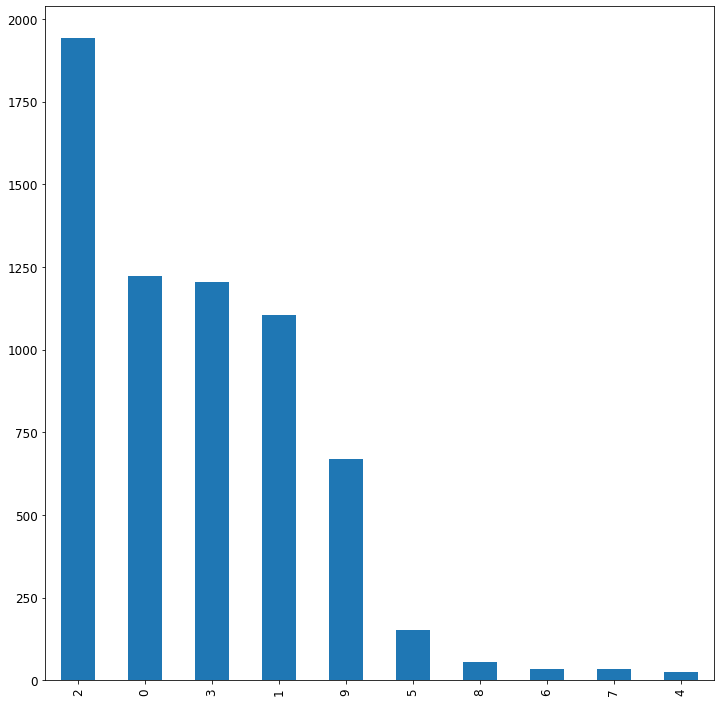

In [32]:
df_topic_theme["dominant_topic"].value_counts().sort_values(ascending=False).plot(kind="bar")

In [33]:
# Predict the topic
mytext = ["""Great place with a very good range of vehicles, it's hard to find the right one.
I'm not sure about an e-mobile or hybrid, I'll get more info and advice.
The staff here is very friendly and helpful, it's really only about the car 
type, but I'll find that out calmly and with good advice."""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['service', 'friendly', 'good', 'great', 'staff', 'advice', 'competent', 'nice', 'car', 'super', 'thank', 'customer', 'satisfied', 'dealership', 'helpful', 'recommend', 'handling', 'reliable', 'fast', 'pleasant'] [[0.00476248 0.20548803 0.59918737 0.00476249 0.16198508 0.00476525
  0.0047619  0.0047619  0.00476225 0.00476324]]


In [34]:
mytext= ["""
Unreliable and unfriendly. At the reception you only get a "good morning" (if at all) 
after the end of the private conversation.
In the course of repairing accident damage, the charging problem on my new A6 Hybrid should also be dealt with. 
Of course it wasn't during the accident repairs. 
In addition, MyAudi does not work and an appointment always turns into a second appointment. 
Have now switched dealers and everything was done with good coordination the first time.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['drive', 'dealer', 'order', 'test', 'tire', 'vehicle', 'change', 'audi', 'conversation', 'charge', 'accident', 'pick', 'damage', 'reception', 'spare', 'appointment', 'offer', 'completely', 'winter', 'today'] [[0.00312628 0.00312622 0.00312814 0.00312548 0.003125   0.91455338
  0.00312502 0.06043985 0.00312513 0.00312551]]


In [35]:
mytext= ["""
In contrast to some other Audi agencies, I have had good experiences here so far. 
However, the parking situation clouds the picture a bit. 
You often have to drive around the company's own parking lot a few times to see if and until something is free. 
So far, the service and quality have convinced me. staff friendly.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['audi', 'car', 'buy', 'center', 'good', 'vehicle', 'customer', 'time', 'use', 'new', 'question', 'feel', 'answer', 'advise', 'seller', 'look', 'dealership', 'sale', 'experience', 'purchase'] [[0.00434872 0.73935073 0.15556055 0.00434819 0.00434783 0.07465118
  0.00434783 0.00434783 0.00434791 0.00434925]]


In [36]:
mytext= ["""
I bought an Audi A5 Sportback there on 11/05/21 worth over €57,000 and ran 16,886 km. 
The purchase process was a bit bumpy in places, since the necessary papers for registration were sent to me far too late, 
but with a lot of luck it worked out anyway.
I was greeted in a friendly manner in the dealership itself and looked after with a little waiting time and coffee.
The handover itself was also ok and quick, the preparation of the car was ok rims were still dirty 
and the inside of the windows had not been cleaned, 
I'm not usually that picky but I was assured that the car is only delivered in perfect condition! 
Original sound from the seller.
When I got home, after a good 500 km of driving on the motorway, 
I noticed that the oil level in the vehicle was at a minimum, which the app with which 
I connected the vehicle then informed me about. 
I then wrote to Audi Hochstraße with the "request" to send me 1 l of oil, which has not happened until today, 
I didn't even get an answer (after 2 emails)!!! after the purchase, the customer doesn't seem to be interested anymore... 
at least my feeling tells me.
I'm definitely used to better from my Audi center in Trier.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['service', 'car', 'time', 'audi', 'appointment', 'day', 'repair', 'workshop', 'vehicle', 'customer', 'unfortunately', 'problem', 'week', 'work', 'wait', 'long', 'employee', 'come', 'cost', 'hour'] [[0.33972615 0.16189862 0.00133355 0.1613975  0.00133337 0.02331586
  0.01752655 0.01554849 0.00133337 0.27658653]]


In [37]:
mytext= ["""
Great car dealership, with a pleasant atmosphere
I received competent and detailed advice from Mr. Höber. 
He fully addressed my needs without being intrusive. My purchase decision has already been made.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['service', 'friendly', 'good', 'great', 'staff', 'advice', 'competent', 'nice', 'car', 'super', 'thank', 'customer', 'satisfied', 'dealership', 'helpful', 'recommend', 'handling', 'reliable', 'fast', 'pleasant'] [[0.00625162 0.147552   0.5117723  0.00625171 0.09803013 0.00625026
  0.04408798 0.1012954  0.07225758 0.00625103]]


# SKLEARN

In [38]:
from sklearn.decomposition import NMF

n_features = 4000
n_components = 10
n_top_words = 20

# ignore terms that have a document frequency strictly higher than 95%, 
# ignore terms that have a document frequency strictly lower than 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(english['lemma_stopped'].values.astype(str))

# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
nmf_output = nmf.fit_transform(tfidf)

def show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Word 0,service,car,great,friendly,good,nice,competent,thank,advice,super
Word 1,customer,audi,team,staff,hand,staff,friendly,mr,recommend,satisfied
Word 2,fast,buy,dealership,helpful,experience,seller,fast,help,mr,dealership
Word 3,perfect,dealership,work,professional,feel,people,employee,professional,excellent,recommend
Word 4,bad,time,service,welcome,dealership,employee,team,quick,buy,year
Word 5,appointment,new,workshop,courteous,workshop,selection,recommend,team,gladly,completely
Word 6,excellent,vehicle,selection,recommend,price,contact,mr,big,purchase,mr
Word 7,quick,customer,atmosphere,super,people,courteous,reliable,support,support,fast
Word 8,advisor,mr,recommend,help,selection,house,extremely,fast,processing,customer
Word 9,friendly,use,car,attentive,team,helpful,pleasant,like,new,manuelwalter


In [39]:
Topics_theme = ['Customer/Service', 'Dealership/Buy', 'Team/Atmosphere', 'Friendly/Professional	', 
                "Expensive/Cheap", "Staff/Employee", 'Competent/Recommend', 'Thank/Help', 
                'Advice/Purchase', 'Super/Satisfied']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,Customer/Service,Dealership/Buy,Team/Atmosphere,Friendly/Professional\t,Expensive/Cheap,Staff/Employee,Competent/Recommend,Thank/Help,Advice/Purchase,Super/Satisfied
Word 0,service,car,great,friendly,good,nice,competent,thank,advice,super
Word 1,customer,audi,team,staff,hand,staff,friendly,mr,recommend,satisfied
Word 2,fast,buy,dealership,helpful,experience,seller,fast,help,mr,dealership
Word 3,perfect,dealership,work,professional,feel,people,employee,professional,excellent,recommend
Word 4,bad,time,service,welcome,dealership,employee,team,quick,buy,year
Word 5,appointment,new,workshop,courteous,workshop,selection,recommend,team,gladly,completely
Word 6,excellent,vehicle,selection,recommend,price,contact,mr,big,purchase,mr
Word 7,quick,customer,atmosphere,super,people,courteous,reliable,support,support,fast
Word 8,advisor,mr,recommend,help,selection,house,extremely,fast,processing,customer
Word 9,friendly,use,car,attentive,team,helpful,pleasant,like,new,manuelwalter


In [40]:
# Predict the topic
mytext = ["""Great place with a very good range of vehicles, it's hard to find the right one.
I'm not sure about an e-mobile or hybrid, I'll get more info and advice.
The staff here is very friendly and helpful, it's really only about the car 
type, but I'll find that out calmly and with good advice."""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['great', 'team', 'dealership', 'work', 'service', 'workshop', 'selection', 'atmosphere', 'recommend', 'car', 'people', 'job', 'courteous', 'support', 'kevinpfeifer', 'simply', 'contact', 'happy', 'condition', 'employee'] [[0.00476248 0.20548803 0.59918737 0.00476249 0.16198508 0.00476525
  0.0047619  0.0047619  0.00476225 0.00476324]]


In [41]:
mytext= ["""
In contrast to some other Audi agencies, I have had good experiences here so far. 
However, the parking situation clouds the picture a bit. 
You often have to drive around the company's own parking lot a few times to see if and until something is free. 
So far, the service and quality have convinced me. staff friendly.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['car', 'audi', 'buy', 'dealership', 'time', 'new', 'vehicle', 'customer', 'mr', 'use', 'seller', 'center', 'recommend', 'appointment', 'drive', 'look', 'want', 'like', 'come', 'purchase'] [[0.00434872 0.73935073 0.15556055 0.00434819 0.00434783 0.07465118
  0.00434783 0.00434783 0.00434791 0.00434925]]


In [42]:
mytext= ["""
Unreliable and unfriendly. At the reception you only get a "good morning" (if at all) 
after the end of the private conversation.
In the course of repairing accident damage, the charging problem on my new A6 Hybrid should also be dealt with. 
Of course it wasn't during the accident repairs. 
In addition, MyAudi does not work and an appointment always turns into a second appointment. 
Have now switched dealers and everything was done with good coordination the first time.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['nice', 'staff', 'seller', 'people', 'employee', 'selection', 'contact', 'courteous', 'house', 'helpful', 'team', 'large', 'car', 'kevinpfeifer', 'reception', 'super', 'dealership', 'accommodate', 'uncomplicated', 'workshop'] [[0.00312628 0.00312622 0.00312814 0.00312548 0.003125   0.91455338
  0.00312502 0.06043985 0.00312513 0.00312551]]


In [43]:
mytext= ["""
I bought an Audi A5 Sportback there on 11/05/21 worth over €57,000 and ran 16,886 km. 
The purchase process was a bit bumpy in places, since the necessary papers for registration were sent to me far too late, 
but with a lot of luck it worked out anyway.
I was greeted in a friendly manner in the dealership itself and looked after with a little waiting time and coffee.
The handover itself was also ok and quick, the preparation of the car was ok rims were still dirty 
and the inside of the windows had not been cleaned, 
I'm not usually that picky but I was assured that the car is only delivered in perfect condition! 
Original sound from the seller.
When I got home, after a good 500 km of driving on the motorway, 
I noticed that the oil level in the vehicle was at a minimum, which the app with which 
I connected the vehicle then informed me about. 
I then wrote to Audi Hochstraße with the "request" to send me 1 l of oil, which has not happened until today, 
I didn't even get an answer (after 2 emails)!!! after the purchase, the customer doesn't seem to be interested anymore... 
at least my feeling tells me.
I'm definitely used to better from my Audi center in Trier.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

# close topics

['service', 'customer', 'fast', 'perfect', 'bad', 'appointment', 'excellent', 'quick', 'advisor', 'friendly', 'courteous', 'reception', 'time', 'employee', 'quality', 'manuelwalter', 'inspection', 'gladly', 'personal', 'year'] [[0.33972615 0.16189862 0.00133355 0.1613975  0.00133337 0.02331586
  0.01752655 0.01554849 0.00133337 0.27658653]]


In [44]:
mytext= ["""
Great car dealership, with a pleasant atmosphere
I received competent and detailed advice from Mr. Höber. 
He fully addressed my needs without being intrusive. My purchase decision has already been made.
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['great', 'team', 'dealership', 'work', 'service', 'workshop', 'selection', 'atmosphere', 'recommend', 'car', 'people', 'job', 'courteous', 'support', 'kevinpfeifer', 'simply', 'contact', 'happy', 'condition', 'employee'] [[0.00625162 0.147552   0.5117723  0.00625171 0.09803013 0.00625026
  0.04408798 0.1012954  0.07225758 0.00625103]]


In [45]:
mytext= ["""
You are a good customer until you buy the new car. After 5 years you are uninteresting. 
One seller even found the whole thing funny.....
You stay alone with your problems and costs. My Audi always has something.
This no longer has anything to do with a premium brand. Rather premium bad quality. I
will never have an Audi again. Unfortunately
It is enough if you call once and describe the problem.
A seller found that funny anyway (cash on delivery with K, Turkish or Greek).
As I said, everything is fine until you buy or order a new car. You're no longer interesting later
"""]
topic, prob_scores = predict_topic(text = mytext)
print(topic, prob_scores)

['super', 'satisfied', 'dealership', 'recommend', 'year', 'completely', 'mr', 'fast', 'customer', 'manuelwalter', 'team', 'helpful', 'easy', 'walter', 'absolutely', 'reliable', 'quickly', 'far', 'perfectly', 'work'] [[0.12898754 0.24091885 0.0028575  0.00285726 0.00285714 0.00285822
  0.00285738 0.00285714 0.07506304 0.53788593]]
